In [ ]:
! pip install matplotlib scikit-image 

In [4]:
# downloading training and testing dataset and also generating HOG Features
import cv2
import os
from pathlib import Path
from matplotlib import pyplot as plt
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

data = []
label=[]
tdata=[]
tlabel=[]
rawImg =[]
trawdata = []
FI = []
for t in range(1,11):
  k=t
  if(t==10):
    t="00010"+"/train.txt"
    fol="00010"
    m="00010"+"/test.txt"
  else:
   fol="0000"+str(t)
   t="0000"+str(t)+"/train.txt"
   m="0000"+str(k)+"/test.txt"
   
  
  fpath = os.path.join("/content/drive/MyDrive/CS893 Sp2022 A1 Dataset/",t)
  tpath = os.path.join("/content/drive/MyDrive/CS893 Sp2022 A1 Dataset/",m)
  f = open(fpath, "r")
  te= open(tpath,"r")
  for x in f:
   path = os.path.join("/content/drive/MyDrive/CS893 Sp2022 A1 Dataset/",fol.strip(),x.strip())
   img = cv2.imread(path)
   resized_img = resize(img, (128,64)) 
   fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
   rawImg.append(img)
   data.append(fd)
   label.append(k)
  f.close()
  for x in te:
    path = os.path.join("/content/drive/MyDrive/CS893 Sp2022 A1 Dataset/",fol.strip(),x.strip())
    img = cv2.imread(path)
    resized_img = resize(img, (128,64)) 
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
    trawdata.append(img)
    tdata.append(fd)
    FI.append(hog_image)
    tlabel.append(k)
   

    



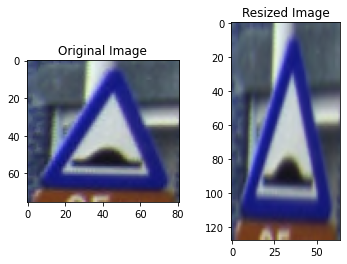

In [5]:
#Plot Some images for resizing
f, axarr = plt.subplots(1,2)
axarr[0].imshow(rawImg[0])
axarr[0].title.set_text("Original Image")
axarr[1].imshow(resize(rawImg[0], (128,64)))
axarr[1].title.set_text("Resized Image")


In [6]:
#Applying the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=110)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(data, label)

y_pred=clf.predict(tdata)
cm = confusion_matrix(tlabel, y_pred)
t=metrics.classification_report(tlabel, y_pred, digits=2)
print(t)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Text(0.5, 0.98, 'Correctly classified images Using HOG with Random Forest Classifier')

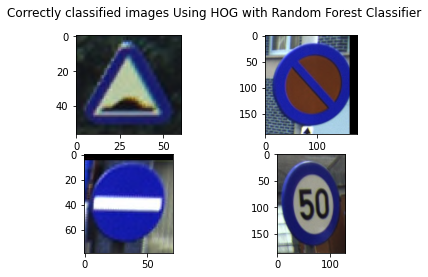

In [7]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(trawdata[0])
axarr[0,1].imshow(trawdata[199])
axarr[1,0].imshow(trawdata[90])
axarr[1,1].imshow(trawdata[50])
plt.suptitle("Correctly classified images Using HOG with Random Forest Classifier")



In [8]:
#Image classificaion using HOG with Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics

gnb = GaussianNB().fit(data, label)
gnb_predictions = gnb.predict(tdata)
 
cm = confusion_matrix(tlabel, gnb_predictions)
t=metrics.classification_report(tlabel, gnb_predictions, digits=2)
print(t)

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       1.00      0.85      0.92        20
           3       1.00      0.75      0.86        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       0.69      1.00      0.82        20
           8       0.83      1.00      0.91        20
           9       1.00      0.85      0.92        20
          10       1.00      0.95      0.97        20

    accuracy                           0.94       200
   macro avg       0.95      0.93      0.94       200
weighted avg       0.95      0.94      0.94       200



Text(0.5, 0.98, 'Incorrectly classified images Using HOG with Naive Bayes Classifier')

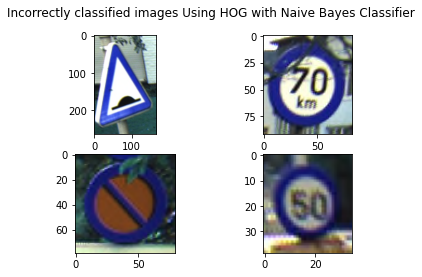

In [ ]:
idx=0
l=[]
k=[]
for i in tlabel:
  if(i!=gnb_predictions[idx]):
    l.append(idx)
  if(i==gnb_predictions[idx]):
    k.append(idx)
  idx=idx+1
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(trawdata[l[0]])
axarr[0,1].imshow(trawdata[l[1]])
axarr[1,0].imshow(trawdata[l[len(l)-1]])
axarr[1,1].imshow(trawdata[l[5]])
plt.suptitle("Incorrectly classified images Using HOG with Naive Bayes Classifier")

Text(0.5, 0.98, 'Correctly classified images Using HOG with Naive Bayes Classifier')

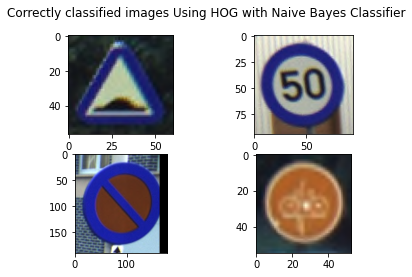

In [ ]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(trawdata[k[0]])
axarr[0,1].imshow(trawdata[k[50]])
axarr[1,0].imshow(trawdata[k[len(k)-1]])
axarr[1,1].imshow(trawdata[k[len(k)-40]])
plt.suptitle("Correctly classified images Using HOG with Naive Bayes Classifier")

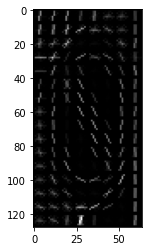

In [14]:
#Feature Map
plt.imshow(FI[0], cmap=plt.cm.gray) 
